In [2]:
def Ord(a,b,p1,p): #нахождение порядка элемента (большие и малые шаги)
    m = int(sqrt(p1)) + 1
    r = []
    A = a.powermod(m,p)
    y = 1
    for j in range(1,m+1):
        y = y * A % p
        r+= [y]
        
    y = b
    for i in range(m+1):
        if y in r:
            return ((r.index(y)+1) * m - i) % p1
        else: y = y * a % p
    print('nema')
    return 'nema'

def Polig_Hellman(a,b,i,p):
    X = 0
    g = a.powermod(i[0]^(i[1]-1), p)
    for j in range(i[1]):
        B = (b * xgcd(a.powermod(X, p),p)[1]).powermod(i[0]^(i[1]-1-j), p)
        l = Ord(g,B,i[0].powermod(j, p),p)
        if l == 'nema': return 'nema'
        X = X + l * i[0].powermod(j, p)
    return X

def System(m,a,b,p): #составление системы уравнений
    x = []
    for i in m:
        p1 = i[0]^i[1]
        A = a.powermod((p-1)/p1, p)
        B = b.powermod((p-1)/p1, p)
        if i[1] > 1: l = Polig_Hellman(A,B,i,p)
        else: l = Ord(A,B,p1,p)
        if l == 'nema': return 'nema'
        x += [[l, p1]]
    return x

def Log(a,b,p): #алгоритм полига-хелмана
    m = factor(p-1)
    M = p-1
    print(m)
    x = System(m,a,b,p)
    if x == 'nema': return 'нет решения'
    print ('x: ',x)
    X = sum(xgcd(M / i[1], i[1])[1] % i[1] * i[0] * (M / i[1]) for i in x) % M #китайская теорема об остатках
    return X, b == a.powermod(X,p)

In [14]:
a = 2^34 - 23453
b = 2^13 - 216
p = 2^40 - 195
print('40: ',Log(a,b,p),'\n\n')

a = 2^34 - 23
b = 2^45 - 12645678
p = 2^45 - 69
print('45: ',Log(a,b,p),'\n\n')

a = 2^34 - 23453
b = 2^45 - 345765436
p = 2^50 - 51
print('50: ',Log(a,b,p),'\n\n')

a = 10
b = 2^68 - 8765456
p = 2^70 - 923
print('70: ',Log(a,b,p),'\n\n')

a = 2^45 - 654567
b = 2^90
p = 2^100 - 15
print('100: ',Log(a,b,p),'\n\n')

a = 2^100 - 876543567
b = 2^110
p = 2^120 - 6083
print('120: ',Log(a,b,p),'\n\n')

a = 2^75 - 3456754
b = 2^90 - 123
p = 2^150 - 3
print('150: ',Log(a,b,p),'\n\n')

a = 2^75 - 3456754
b = 2^90 - 123
p = 2^170 - 255
(print('170: ',Log(a,b,p),'\n\n'))

2^2 * 3^2 * 5 * 61 * 191 * 269 * 1949
x:  [[0, 4], [0, 9], [4, 5], [51, 61], [136, 191], [112, 269], [1944, 1949]]
40:  (805601299104, True) 


2 * 13 * 29761 * 45470417
x:  [[1, 2], [6, 13], [8193, 29761], [42910994, 45470417]]
45:  (25207068749531, True) 


2^2 * 3 * 103 * 1063 * 6491 * 132019
x:  [[0, 4], [2, 3], [33, 103], [20, 1063], [3272, 6491], [11549, 132019]]
50:  (288108765128252, True) 


2^2 * 5^4 * 71 * 26387 * 53089 * 4747957
x:  [[2, 4], [4670, 625], [60, 71], [482, 26387], [34851, 53089], [1271099, 4747957]]
70:  (47201136612185764670, True) 


2^4 * 3^2 * 5 * 7 * 13 * 17 * 97 * 193 * 241 * 257 * 673 * 65537 * 22253377
x:  [[36, 16], [0, 9], [0, 5], [5, 7], [7, 13], [13, 17], [63, 97], [72, 193], [44, 241], [203, 257], [15, 673], [2816, 65537], [9189275, 22253377]]
100:  (992527403962474944640041053940, True) 


2^2 * 7 * 11 * 23 * 1151 * 4783 * 15583 * 6719593 * 8303821 * 39198839
x:  [[2, 4], [4, 7], [0, 11], [18, 23], [766, 1151], [867, 4783], [11222, 15583], [63966

In [7]:
a = 2^75 - 3456754
b = 2^90 - 12
p = 2^150 - 3
print('150: ',Log(a,b,p),'\n\n')

2^2 * 3 * 5 * 149 * 223 * 593 * 1777 * 25781083 * 184481113 * 231769777 * 616318177
nema
150:  нет решения 




In [52]:
# список P
P=[] 
i = 40
while i<150:
    j = 1
    while j<10000:
        if is_prime(2^i-j): 
            m = factor(2^i-j-1)
            if m[len(m)-1][0]<1000000000:
                P+=[2^i-j]
        j+=2
    i+=10
print(len(P))

1


1099511627689
1099511623901
1099511620063
1125899906840057
1125899906833601
1180591620717411299563
[[39, 0.0], [43, 0.016000000000076398], [44, 0.0], [45, 0.0], [45, 0.0], [47, 0.0], [47, 0.0], [49, 0.01499999999987267], [54, 0.0], [61, 0.0], [67, 0.0], [71, 0.0], [79, 0.0], [80, 0.0], [89, 0.01599999999962165], [96, 0.0], [97, 0.0], [100, 0.0], [103, 0.016000000000076398], [104, 0.0], [108, 0.0], [113, 0.0], [114, 0.0], [116, 0.0], [122, 0.0], [125, 0.0], [136, 0.0], [136, 0.01499999999987267], [142, 0.0], [142, 0.016000000000076398], [146, 0.0], [147, 0.0], [168, 0.0], [169, 0.0], [174, 0.0], [177, 0.0], [177, 0.0], [187, 0.0], [206, 0.0], [210, 0.016000000000076398], [214, 0.0], [218, 0.0], [219, 0.016000000000076398], [227, 0.015000000000327418], [235, 0.0], [247, 0.016000000000076398], [256, 0.0], [268, 0.0], [270, 0.0], [272, 0.0], [278, 0.0], [279, 0.0], [280, 0.0], [284, 0.0], [295, 0.0], [297, 0.0], [304, 0.0], [320, 0.0], [325, 0.0], [332, 0.0], [338, 0.0], [344, 0.0], [356, 

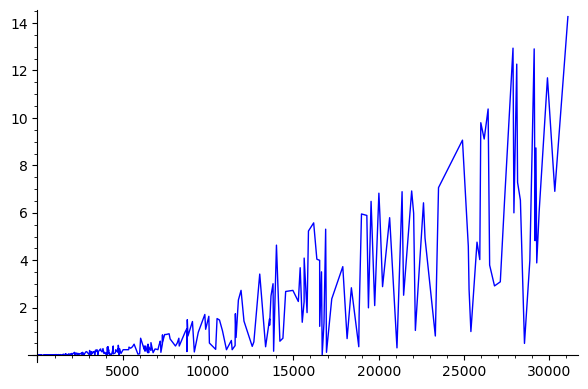

[[1451, 0.0], [1787, 0.016000000000076398], [1879, 0.0], [1949, 0.0], [2003, 0.0], [2143, 0.0], [2203, 0.0], [2357, 0.01499999999987267], [2819, 0.0], [3643, 0.0], [4481, 0.0], [4999, 0.0], [6199, 0.0], [6271, 0.0], [7817, 0.01599999999962165], [9029, 0.0], [9281, 0.0], [9883, 0.0], [10453, 0.016000000000076398], [10631, 0.0], [11551, 0.0], [12689, 0.0], [12829, 0.0], [13339, 0.0], [14821, 0.0], [15377, 0.0], [18329, 0.01499999999987267], [18371, 0.0], [20023, 0.016000000000076398], [20113, 0.0], [21101, 0.0], [21323, 0.0], [28019, 0.0], [28547, 0.0], [30223, 0.0], [31159, 0.0], [31247, 0.0], [34763, 0.0], [42337, 0.0], [43973, 0.016000000000076398], [45677, 0.0], [47431, 0.0], [47681, 0.016000000000076398], [51383, 0.015000000000327418], [55109, 0.0], [60919, 0.016000000000076398], [65053, 0.0], [71347, 0.0], [72493, 0.0], [73961, 0.0], [77249, 0.0], [77291, 0.0], [78277, 0.0], [80263, 0.0], [86939, 0.0], [87719, 0.0], [92233, 0.0], [102013, 0.0], [105517, 0.0], [109987, 0.0], [113797

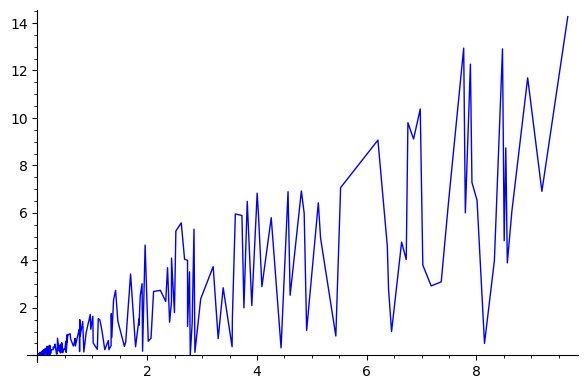

In [90]:
a = 2
b = 2^30
x=[]
y=[]
i=0
for p in P:
    if i%100==0:print(p)
    i+=1
    m = factor(p-1)
    t = cputime()
    g = Log(a,b,p)
    T = cputime(t)
    if g!='нет решения':
        x += [[int(sqrt(m[len(m)-1][0]))+1,T]]
        y += [[m[len(m)-1][0],T]]
x = sorted(x, key=lambda z: z[0])
print(x)
show(line(x))
y = sorted(y, key=lambda z: z[0])
print(y)
line(y)